In [4]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [5]:
state = 'MH'

In [6]:
c_dataset = pd.read_csv("Confirmed - copy.csv")
c_dataset['Date'] = pd.to_datetime(c_dataset['Date'], infer_datetime_format=True)
c_data = c_dataset.set_index(['Date'])
c_data = c_data[[state]]
c_data[state] = c_data[state].fillna(0)

In [7]:
cases = c_data[state].resample('D').mean()#D,W,MS

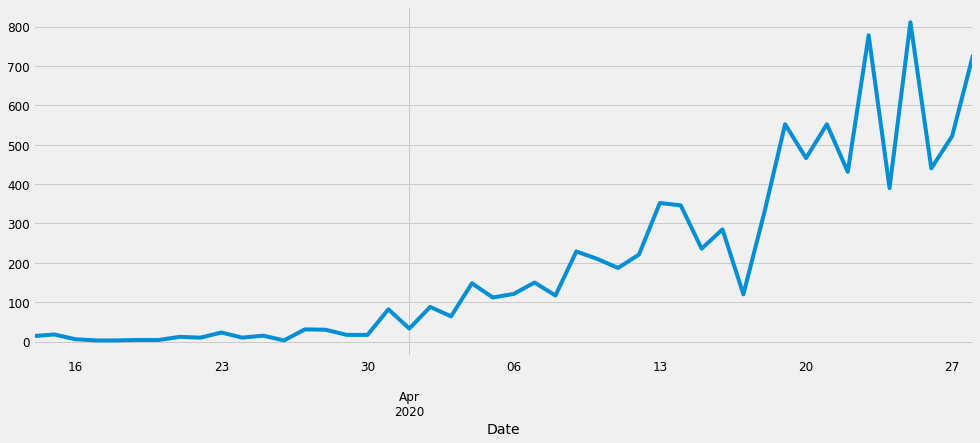

In [8]:
cases.plot(figsize=(15, 6))
plt.show()

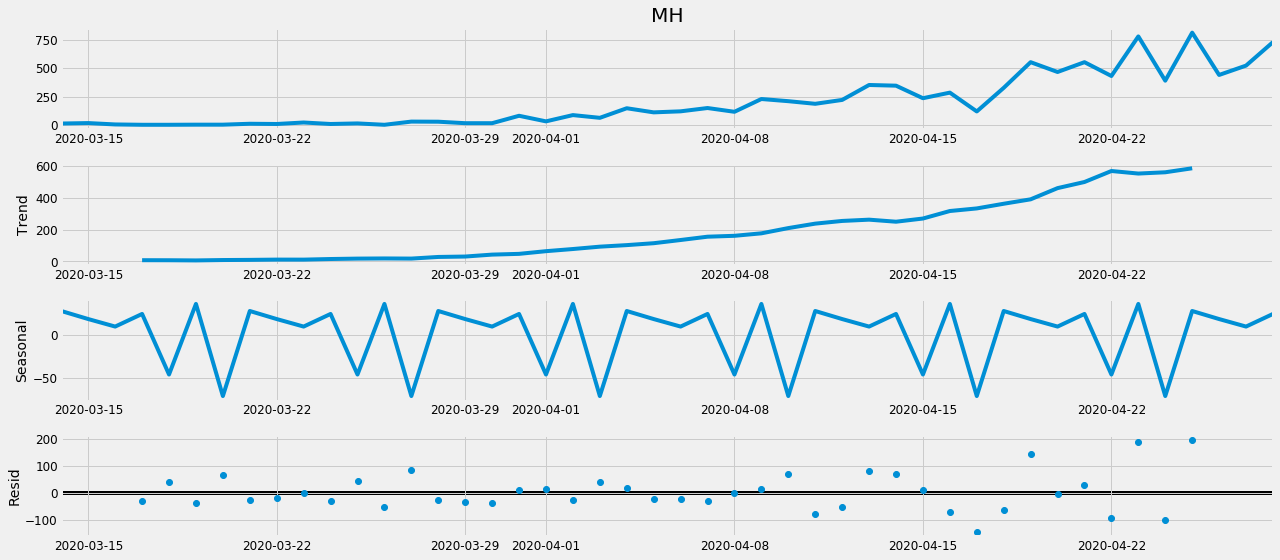

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
c_decomposition = sm.tsa.seasonal_decompose(cases, model='additive')
c_fig = c_decomposition.plot()
plt.show()

In [10]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            cases_mod = sm.tsa.statespace.SARIMAX(cases,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            cases_results = cases_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, cases_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:644.8376598759254
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1300.189523607424
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:455.1915132413014
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:291.2721416004957
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:433.9876433449506
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1317.0334808041157
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:290.24868778649136
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:279.1738571161938
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:608.7256429364821
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2790.025480463897
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:432.832893521278
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:275.371143512732
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:434.24639005456385
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2575.324221719021
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:290.7584587220213
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:267.67232345445245
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:561.2843740269888


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1428.5900522906477
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:416.11180377897233
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:270.4131154898371
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:430.0607644378239


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1334.0778579002258
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:283.07631422125047
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:272.3934748630228
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:530.8577931261393
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2531.0829141387976
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:389.25602424300644
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:249.5044936991448
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:414.48005546288306


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2449.7326965906946
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:272.416830207375
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:249.669619005341
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:574.6081472874874


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1281.3987585982961
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:427.69121705417786
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:282.24472504025556
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:421.69598649436153


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1207.0901796253786
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:277.7138272800382
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:279.702742794403
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:535.8014142248985
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2628.8435778236167
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:399.5298187486302
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:261.303837609944
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:413.0119363577768
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2384.842235545757
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:273.0743770806471
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:263.1868745817972
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:536.2692006122577


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1127.2648321104896
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:402.53320920517564
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:263.04987854752903
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:402.63294618693635


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1441.2307904486947
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:262.99397391478294
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:265.04644179439356
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:525.6593854150211
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2774.239820986851
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:389.923268545724
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:251.25031568440207
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:403.1842904834617


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2443.8916095915883
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:262.0231193790806
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:252.85092515247436


In [12]:
c_mod = sm.tsa.statespace.SARIMAX(cases,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
cases_results = c_mod.fit()
print(cases_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1562      0.343     -0.456      0.648      -0.828       0.515
ma.L1         -0.7483      0.248     -3.013      0.003      -1.235      -0.261
ma.S.L12       0.2382      0.663      0.359      0.720      -1.062       1.538
sigma2      2.121e+04   8201.227      2.587      0.010    5140.732    3.73e+04


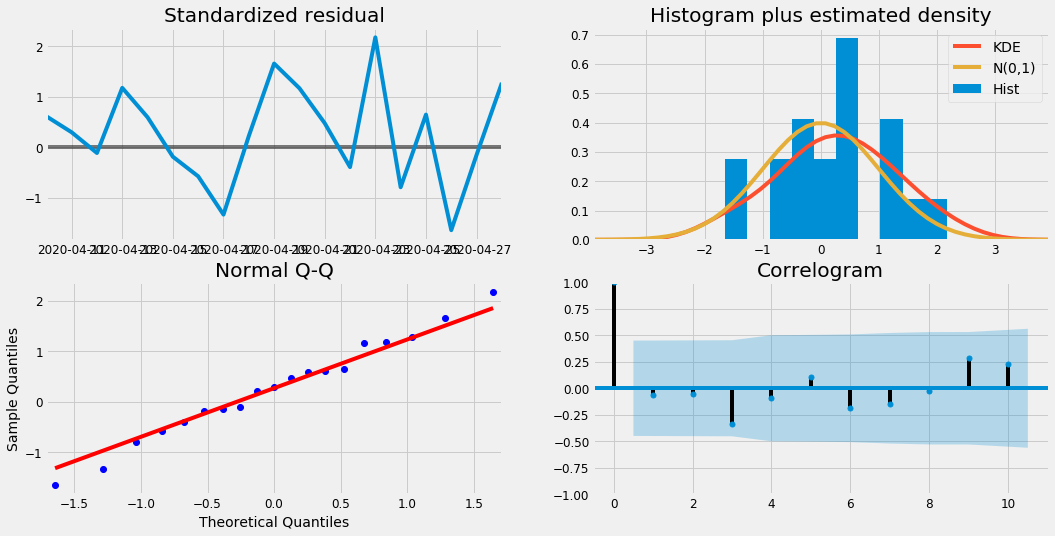

In [13]:
cases_results.plot_diagnostics(figsize=(16, 8))
plt.show()

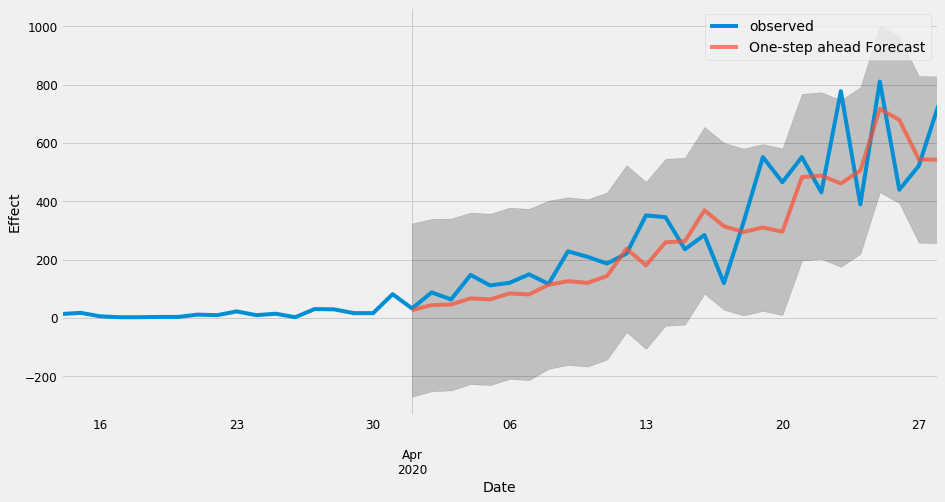

In [14]:
cases_pred = cases_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
cases_pred_ci = cases_pred.conf_int()
cases_ax = cases['2020':].plot(label='observed')
cases_pred.predicted_mean.plot(ax=cases_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.2)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [15]:
cases_forecasted = cases_pred.predicted_mean
cases_truth = cases['2020-04-01':]
cases_mse = ((cases_forecasted - cases_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(cases_mse, 2)))

The Mean Squared Error of our forecasts is 15400.75


In [16]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(cases_mse), 2)))

The Root Mean Squared Error of our forecasts is 124.1


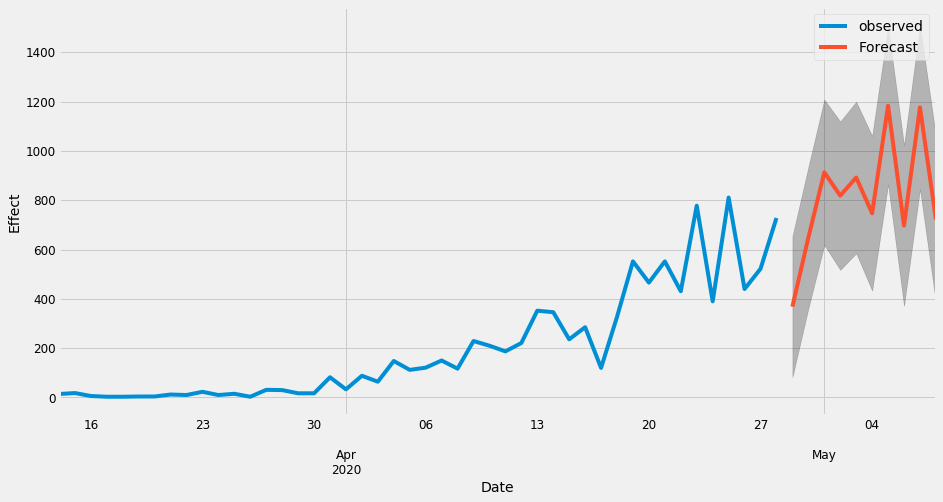

In [17]:
cases_pred_uc = cases_results.get_forecast(steps=10)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [18]:
r_dataset = pd.read_csv("Recovered.csv")
r_dataset['Date'] = pd.to_datetime(r_dataset['Date'], infer_datetime_format=True)
r_data = r_dataset.set_index(['Date'])
r_data = r_data[[state]]
r_data[state] = r_data[state].fillna(0)

In [19]:
total_data = pd.DataFrame()
total_data['Cases'] = c_data[state]
total_data['Recovered'] = r_data[state]

In [20]:
total_data.tail()

,Cases,Recovered
Date,,
2020-04-24,390,117
2020-04-25,811,119
2020-04-26,440,112
2020-04-27,522,94
2020-04-28,728,106


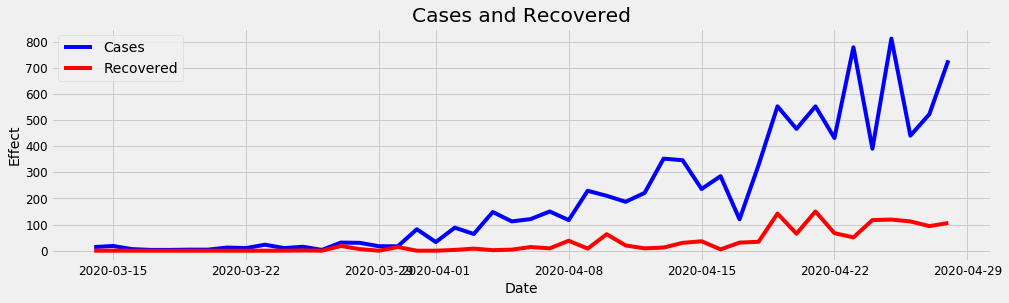

In [21]:
plt.figure(figsize=(15, 4))
plt.plot(total_data.index, total_data['Cases'], 'b-', label = 'Cases')
plt.plot(total_data.index, total_data['Recovered'], 'r-', label = 'Recovered')
plt.xlabel('Date'); plt.ylabel('Effect'); plt.title('Cases and Recovered')
plt.legend()
plt.show()

In [22]:
recovered = total_data['Recovered'].resample('D').mean()

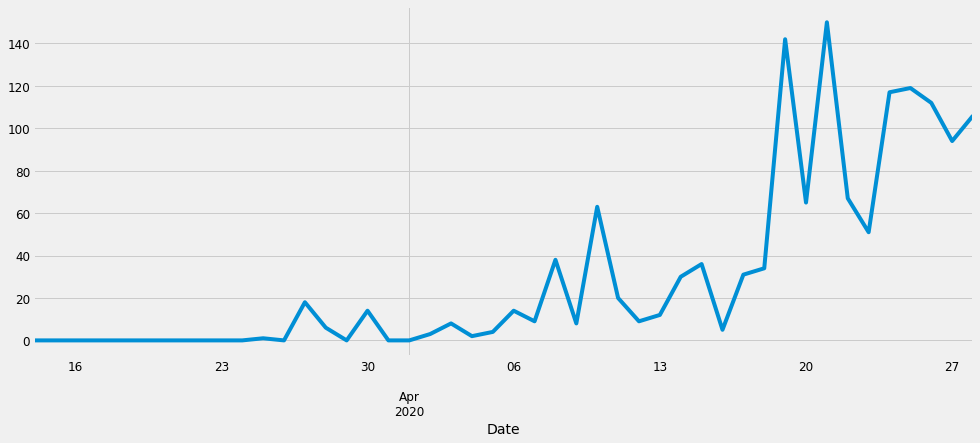

In [23]:
recovered.plot(figsize=(15, 6))
plt.show()

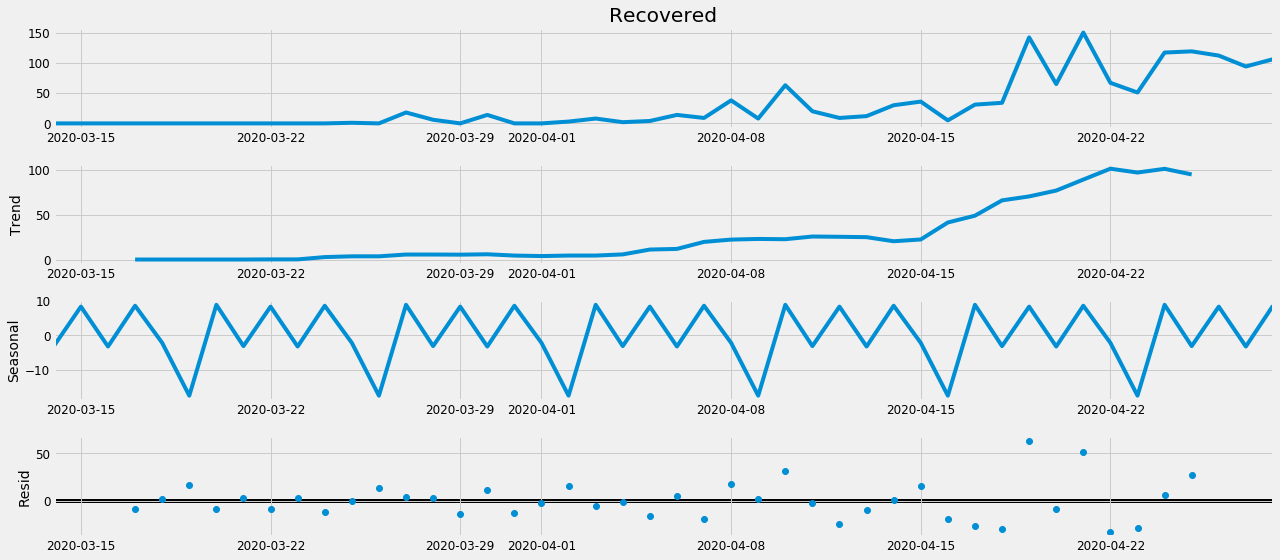

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
recovered_decomposition = sm.tsa.seasonal_decompose(recovered, model='additive')
fig = recovered_decomposition.plot()
plt.show()

In [25]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            recovered_results = recovered_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, recovered_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:486.8191405758447
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1455.6599339955792
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:357.1320222636888


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:237.87438585692013
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:361.649001858287
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1383.37820762847
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:245.72862278252003

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:237.75951776335643
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:460.5623001934946
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2880.1702083767354
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:343.9385445588091
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:227.61646014121138
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:361.3574166176559


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1329.591700831881
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:247.6010508006937
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:225.65657655616218
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:433.41691489761666
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1285.856974611861
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:341.3860988959823
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:219.8063483454982
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:328.15684423807284


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1363.100403030874
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:226.53971630382983
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:216.1095370422855
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:408.94985437993375


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1220.2816978863837
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:313.79505695345455
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:201.0822944270731
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:323.41244222799145


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1294.4348621340905
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:219.7280341402756
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:199.83565329572556
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:441.486525426764


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1536.5184070355108
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:346.73634045667706
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:229.5611642577336
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:329.4226164048475


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1480.9010456808278
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:227.31723019873584
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:227.46623715920342
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:416.6651315856561


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1419.5527003698644
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:320.3186754774017
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:209.79783411190985
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:325.5525051518042


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1365.668964396189
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:219.59888893657097
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:210.70194152226688
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:417.2133702073724


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1290.8499050856149
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:325.35264333209824
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:211.7167326459026
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:313.8445470823341
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1362.3306052748808
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:210.3395406792021
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:210.75335177479025
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:409.4937885485266


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1187.0205224439442
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:312.9822691684152
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:201.91678351388677
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:315.7749548178141


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1207.4955221499329
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:210.7987736364881
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:201.33853857895915


In [26]:
#ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:199.83565329572556
recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
recovered_results = recovered_mod.fit()
print(recovered_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3112      0.282     -1.105      0.269      -0.863       0.241
ma.L1         -0.5823      0.253     -2.305      0.021      -1.077      -0.087
ma.S.L12      -1.0000      0.265     -3.777      0.000      -1.519      -0.481
sigma2      1108.7481      0.000   4.64e+06      0.000    1108.748    1108.749


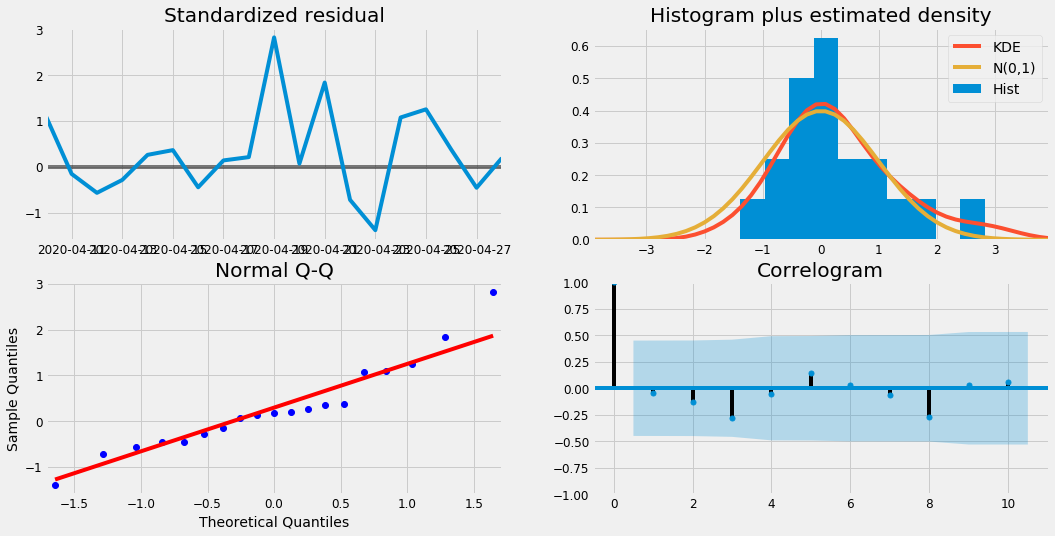

In [27]:
recovered_results.plot_diagnostics(figsize=(16, 8))
plt.show()

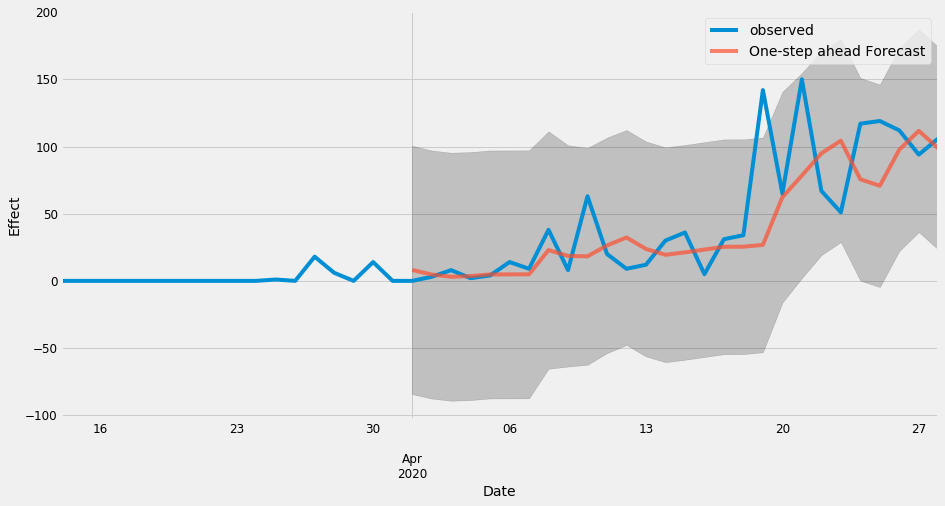

In [28]:
recovered_pred = recovered_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
recovered_pred_ci = recovered_pred.conf_int()
recovered_ax = recovered['2020':].plot(label='observed')
recovered_pred.predicted_mean.plot(ax=recovered_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.2)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [29]:
recovered_forecasted = recovered_pred.predicted_mean
recovered_truth = recovered['2020-04-01':]
recovered_mse = ((recovered_forecasted - recovered_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(recovered_mse, 2)))

The Mean Squared Error of our forecasts is 1095.23


In [30]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(recovered_mse), 2)))

The Root Mean Squared Error of our forecasts is 33.09


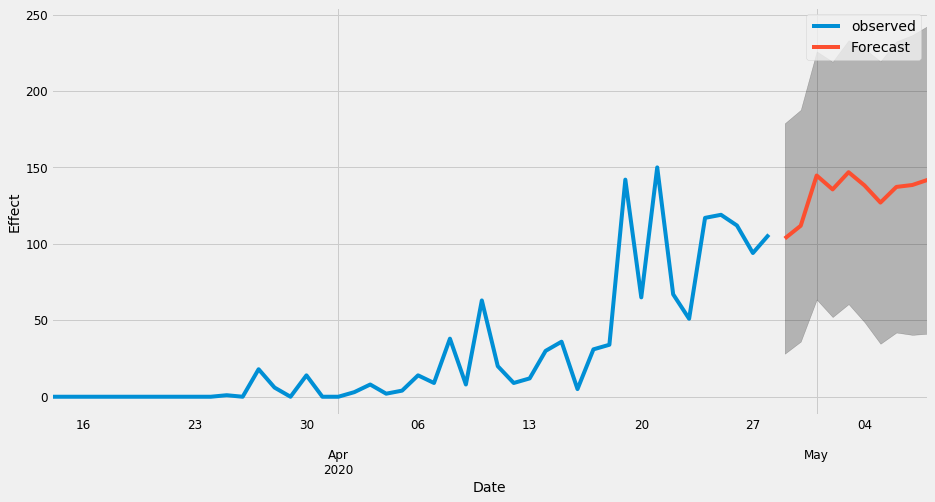

In [31]:
recovered_pred_uc = recovered_results.get_forecast(steps=10)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.25)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

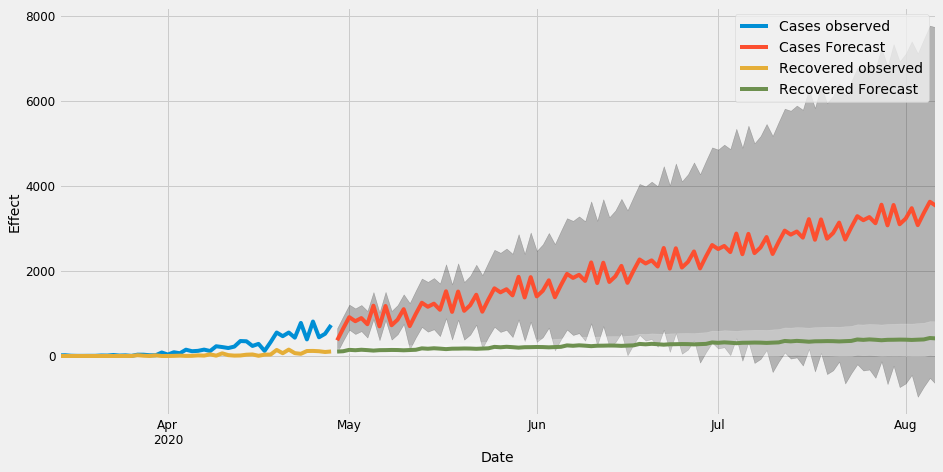

In [32]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='Cases observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Cases Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='Recovered observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Recovered Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='w', alpha=.25)

cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [33]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

In [34]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=0.0].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

IndexError: list index out of range

In [35]:
int(np.mean(cases_result_date)[0])

2086

In [36]:
int(min(cases_result_date[0]))

368

In [37]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=np.ceil(min(cases_result_date[0]))].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-04-29


In [38]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_result_date = pd.DataFrame(recovered_pred_uc.predicted_mean)

In [39]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(recovered_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-06-18


In [40]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(cases_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

IndexError: list index out of range